In [1]:
import pandas as pd


In [18]:
df = pd.read_csv('movie_review.csv')
df.head()

,Unnamed: 0,titles,rates,reviews,review_id
0,0,비상선언,10,NaN,no9a****
1,1,얼라이드,10,잔잔하게 강렬히 와 닫네요,no9a****
2,2,분노의 질주: 더 맥시멈,10,정말 오랜만의 시원한 액션 눈을 땔수가 없었음~출연하는 차들역시 ~,no9a****
3,3,다크 나이트 라이즈,10,세시간이 짧게 느껴진건 오랜만인듯,no9a****
4,4,늑대사냥,10,호불호 심할듯한데 재밌네요,no9a****


In [60]:
df['review_id'] = df['review_id'].replace(r'[\*]','', regex=True)
df['review_id']

0        no9a
1        no9a
2        no9a
3        no9a
4        no9a
         ... 
15707    mrpj
15708    mrpj
15709    mrpj
15710    mrpj
15711    mrpj
Name: review_id, Length: 15712, dtype: object

In [61]:
ids = pd.DataFrame(df['review_id'].value_counts())
ids

,review_id
paul,1920
heav,1890
tjrw,1560
pmh4,1560
hohe,900
...,...
tyhh,2
jkoi,2
kdy3,2
dhks,2


In [62]:
ids = ids.reset_index()
ids


,index,review_id
0,paul,1920
1,heav,1890
2,tjrw,1560
3,pmh4,1560
4,hohe,900
...,...,...
118,tyhh,2
119,jkoi,2
120,kdy3,2
121,dhks,2


In [63]:
ids = ids[ids['review_id'] > 5]
id_list = ids['index']
id_list

0     paul
1     heav
2     tjrw
3     pmh4
4     hohe
      ... 
83    kshs
84    haha
85    lko3
86    lkm9
87    jcep
Name: index, Length: 88, dtype: object

In [64]:
for id in id_list:
    condition = df['review_id'].str.contains(id)
    df1 = df[condition]
    df2 = pd.concat([df2, df1])

In [51]:
df2 = pd.DataFrame()
condition = df['review_id'].str.contains(id_list[0])
df1 = df[condition]
df2 = pd.concat([df2, df1])

error: multiple repeat at position 5

In [69]:
df2 = df2.drop(['Unnamed: 0'], axis='columns')

KeyError: "['Unnamed: 0'] not found in axis"

In [72]:
df2 = df2.reset_index()
df2 = df2.drop(['index'], axis="columns")
df2

,level_0,titles,rates,reviews,review_id
0,0,외계+인 1부,8,이집 짬뽕맛 특이하네..,paul
1,1,토르: 러브 앤 썬더,7,기대감에 비해 그저 그랬음,paul
2,2,헤어질 결심,7,"어떤 사랑은 슬픔이 파도처럼 밀려오고,어떤 사랑은 슬픔이 잉크처럼 천천히 번져 붕괴...",paul
3,3,탑건: 매버릭,9,톰 크루즈가 왜 최고의 스타인지 이유가 되는 영화,paul
4,4,마녀(魔女) Part2. The Other One,8,개연성은 좀 부족하지만 액션이 1편에 비해 나아진듯,paul
...,...,...,...,...,...
15610,15610,어거스트 러쉬,10,"아이의 연기가 좋았고, 음악이 좋았어요...",jcep
15611,15611,어톤먼트,10,매우매우 심플하면서도 마지막의 감동이란....휴....,jcep
15612,15612,공조2: 인터내셔날,10,NaN,jcep
15613,15613,마녀(魔女) Part2. The Other One,2,아 진짜 박훈정 감독 너무 실망이다. 오늘 IPTV에서 천원 이벤트로 봤다. 연출 ...,jcep


In [73]:
df2 = df2.drop(['level_0'], axis="columns")
df2

,titles,rates,reviews,review_id
0,외계+인 1부,8,이집 짬뽕맛 특이하네..,paul
1,토르: 러브 앤 썬더,7,기대감에 비해 그저 그랬음,paul
2,헤어질 결심,7,"어떤 사랑은 슬픔이 파도처럼 밀려오고,어떤 사랑은 슬픔이 잉크처럼 천천히 번져 붕괴...",paul
3,탑건: 매버릭,9,톰 크루즈가 왜 최고의 스타인지 이유가 되는 영화,paul
4,마녀(魔女) Part2. The Other One,8,개연성은 좀 부족하지만 액션이 1편에 비해 나아진듯,paul
...,...,...,...,...
15610,어거스트 러쉬,10,"아이의 연기가 좋았고, 음악이 좋았어요...",jcep
15611,어톤먼트,10,매우매우 심플하면서도 마지막의 감동이란....휴....,jcep
15612,공조2: 인터내셔날,10,NaN,jcep
15613,마녀(魔女) Part2. The Other One,2,아 진짜 박훈정 감독 너무 실망이다. 오늘 IPTV에서 천원 이벤트로 봤다. 연출 ...,jcep


In [75]:
!pip install matplotlib
!pip install seaborn
!pip install wordcloud

     ---------------------------------------- 7.2/7.2 MB 10.0 MB/s eta 0:00:00
     -------------------------------------- 960.0/960.0 kB 8.7 MB/s eta 0:00:00
     -------------------------------------- 162.0/162.0 kB 9.5 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-9.2.0-cp39-cp39-win_amd64.whl (3.3 MB)
  Using cached seaborn-0.12.0-py3-none-any.whl (285 kB)
     -------------------------------------- 153.1/153.1 kB 8.9 MB/s eta 0:00:00


In [79]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

DATA_PATH = './nsmc-master/' #데이터경로 설정
print('파일 크기: ')
for file in os.listdir(DATA_PATH):
  if 'txt' in file:
    print(file.ljust(30)+str(round(os.path.getsize(DATA_PATH+ file) / 100000,2))+'MB')

파일 크기: 
ratings.txt                   195.15MB
ratings_test.txt              48.93MB
ratings_train.txt             146.29MB


In [80]:
#트레인 파일 불러오기
train_data = pd.read_csv(DATA_PATH + 'ratings_train.txt',header = 0, delimiter = '\t', quoting=3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [82]:
#리뷰 전체길이 확인
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

In [83]:
#리뷰 통계 정보
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최댓값: 158
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 42.0


In [84]:
# 문자열 아닌 데이터 모두 제거
train_review = [review for review in train_data['document'] if type(review) is str]
train_review

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

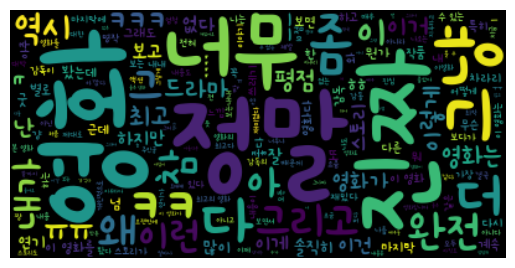

In [86]:
# 한글 폰트 설정(.ttf파일 다운로드 후 실행)
wordcloud = WordCloud(DATA_PATH+'godoMaum.ttf').generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [87]:
!pip install konlpy

  Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
     ---------------------------------------- 3.6/3.6 MB 9.6 MB/s eta 0:00:00
     ------------------------------------- 344.7/344.7 kB 10.8 MB/s eta 0:00:00


In [89]:
!pip install tensorflow

     -------------------------------------- 455.9/455.9 MB 4.2 MB/s eta 0:00:00
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 1.7/1.7 MB 10.7 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 9.1 MB/s eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 11.4 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.7.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     ---------------------------------------- 5.9/5.9 MB 9.9 MB/s eta 0:00:00
  Using cached wrapt-1.14.1-cp39-cp39-win_amd64.whl (35 kB)
     ---------------------------------------- 1.5/1.5

In [116]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

DATA_PATH = './nsmc-master/' # 데이터 경로 설정
train_data = pd.read_csv(DATA_PATH+'ratings_train.txt', header = 0, delimiter='\t', quoting=3)

train_data['document'][:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [117]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [118]:
# 전체 텍스트 전처리
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:4]

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]

In [119]:
#테스트 리뷰도 동일하게 전처리
test_data = pd.read_csv(DATA_PATH + 'ratings_test.txt', header = 0, delimiter='\t', quoting=3)

clean_test_review = []
for review in test_data['document']:
  if type(review) == str:
    clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
  else:
    clean_test_review.append([])

In [97]:
!pip install tqdm

     ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00


In [120]:
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

In [121]:
# 파라미터를 설정합니다.
max_features = 20000
maxlen = 100
batch_size = 512

# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=maxlen,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(train_data['label'])

#평가 데이터 
test_inputs = pad_sequences(test_sequences,maxlen=maxlen,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(test_data['label'])

In [122]:
import tensorflow as tf

# model을 정의합니다.
"""
keras의 기본 Embedding 벡터를 사용하였으며
LSTM 층에 dropout/recurrent_dropout을 적용하였습니다.
"""
model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(max_features, 128), # Embedding Layer를 거친 후의 shape : (batch_size, maxlen, embedding_size=128)
  tf.keras.layers.LSTM(128, dropout=0.3, recurrent_dropout=0.3), # LSTM Layer를 거친 후의 shape : (batch_size, 1, hidden_size=128)
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [113]:
train_inputs.shape, test_inputs.shape

((150000, 100), (50000, 100))

In [123]:
unicorns = model.fit(train_inputs, train_labels,
          batch_size=batch_size, 
          epochs=10, 
          validation_data=(test_inputs,test_labels))

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/embedding_3/embedding_lookup' defined at (most recent call last):
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\traitlets\config\application.py", line 978, in launch_instance
      app.start()
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\mgd81\AppData\Local\Temp\ipykernel_70012\62939389.py", line 1, in <module>
      unicorns = model.fit(train_inputs, train_labels,
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mgd81\anaconda3\envs\project4\lib\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_1/embedding_3/embedding_lookup'
indices[189,4] = 25434 is not in [0, 20000)
	 [[{{node sequential_1/embedding_3/embedding_lookup}}]] [Op:__inference_train_function_8336]